# Технические средства анализа данных

<a href="https://www.anaconda.com/distribution/">Anaconda distribution</a>
<br /><br />
<a href="https://www.jetbrains.com/pycharm/">PyCharm</a> - main IDE for our course
<br /><br />
<a href="https://numpy.org/">Numpy documentation</a><br />
<a href="https://scikit-learn.org/stable/">sklearn documentation</a><br />
<a href="https://opencv.org/">OpenCV documentation</a><br />
<a href="https://matplotlib.org/">Matplotlib documentation</a>

## Задача линейной регрессии

### Сделаем (почти) все неправильно!
### А потом будем исправлять.

### Скачайте исходные данные:
<a href="https://github.com/MKrinitskiy/ML4ES_2019-2020/blob/master/Lect04/LRproblem/data.tsv">source data</a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

In [18]:
import datetime

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 300

In [5]:
df = pd.read_table('./data.tsv')
df.date = pd.to_datetime(df.date, dayfirst=True)
df.weight[:] = [float(a.replace(',', '.')) for a in df.weight]

In [6]:
df.head()

,date,weight
0,2019-01-02,79.4
1,2019-01-04,79.8
2,2019-01-13,79.5
3,2019-01-17,79.8
4,2019-01-19,79.3


In [7]:
df.tail()

,date,weight
170,2019-10-25,75.8
171,2019-10-26,76.6
172,2019-10-27,76.8
173,2019-10-28,76.2
174,2019-10-29,76.4


In [8]:
df['datePOSIX'] = [d.timestamp() for d in df.date]
min_date = df['datePOSIX'].min()
df['datePOSIX'] = df['datePOSIX']-min_date

In [9]:
df.head()

,date,weight,datePOSIX
0,2019-01-02,79.4,0.0
1,2019-01-04,79.8,172800.0
2,2019-01-13,79.5,950400.0
3,2019-01-17,79.8,1296000.0
4,2019-01-19,79.3,1468800.0


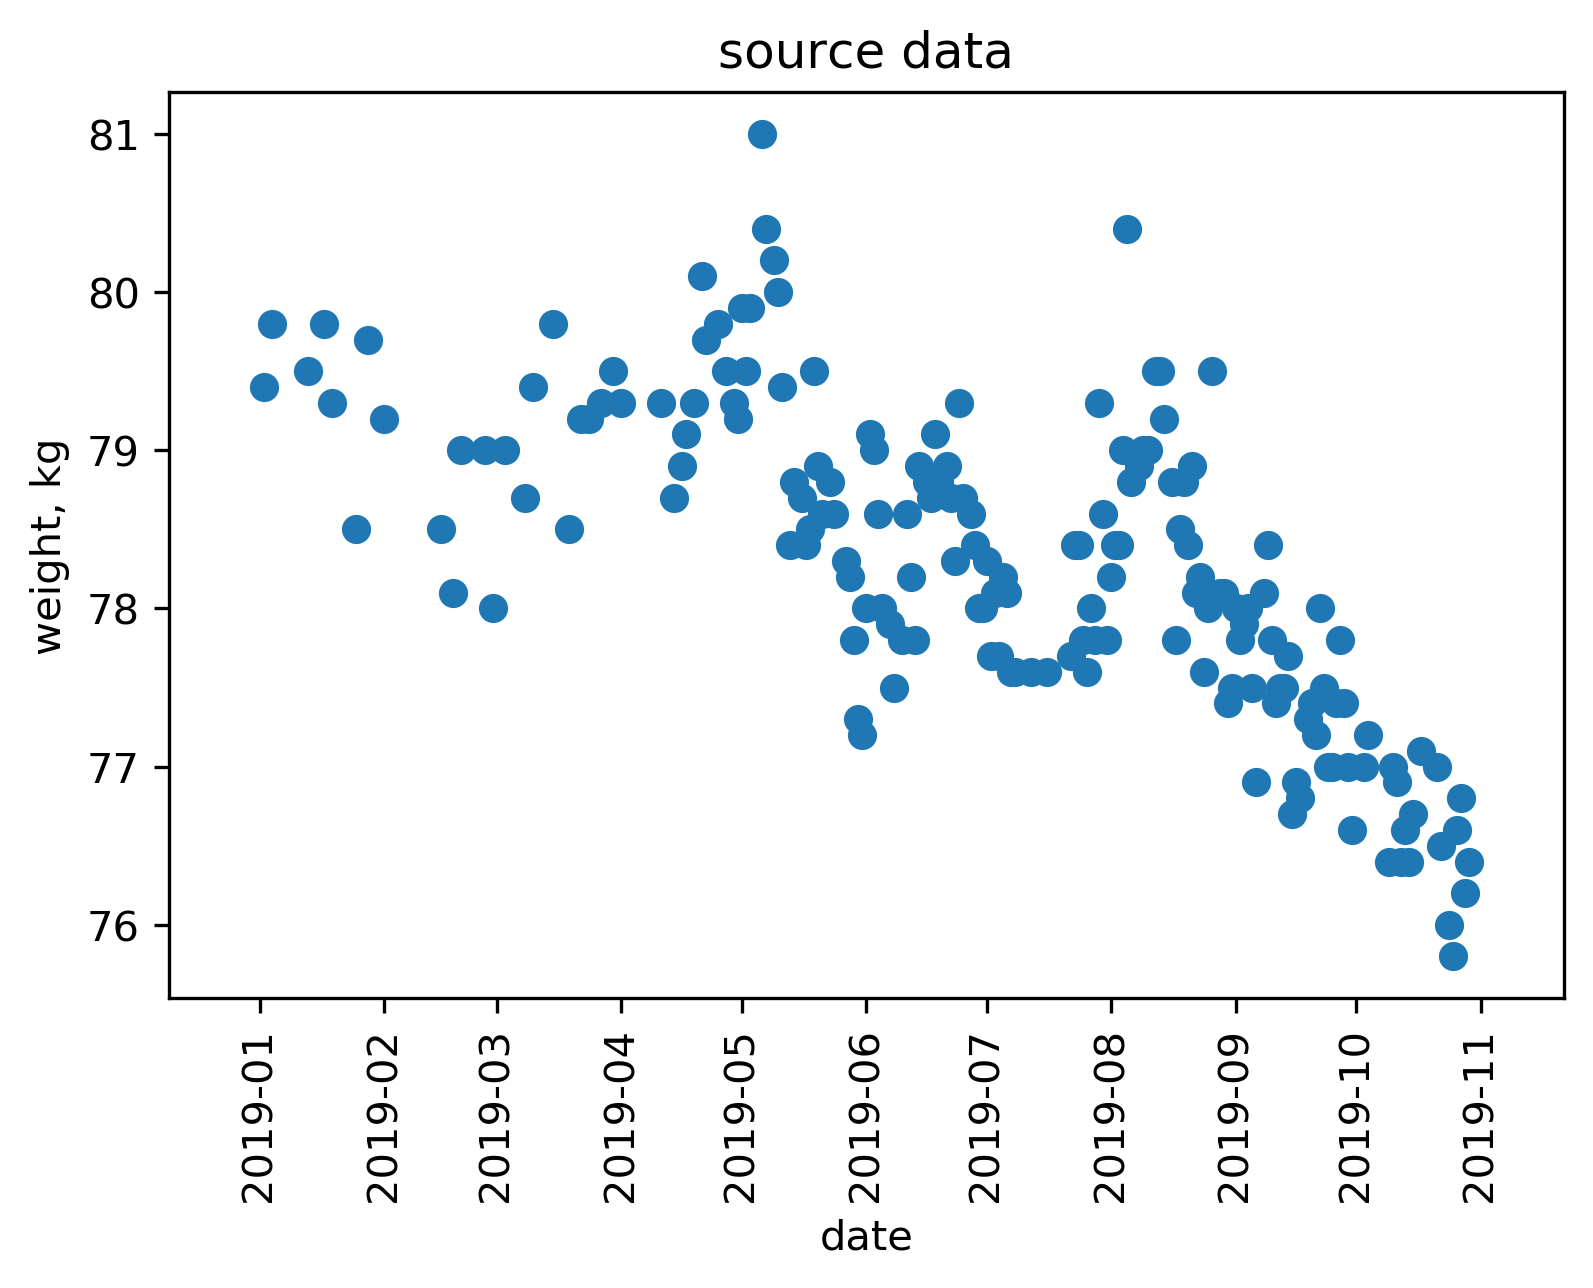

In [10]:
_ = plt.scatter(df.date, df.weight)
_ = plt.title('source data')
_ = plt.xlabel('date')
_ = plt.ylabel('weight, kg')
_ = plt.xticks(rotation=90)

In [11]:
from sklearn.linear_model import Ridge

In [12]:
m = Ridge()

In [13]:
m.fit(np.asarray(df.datePOSIX).reshape((-1, 1)), df.weight)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [14]:
x_lin = np.linspace(df.datePOSIX.min(), df.datePOSIX.max(), 100)

In [15]:
x_lin_datetimes = [pd.Timestamp(dt+min_date, unit='s') for dt in x_lin]

In [16]:
y_approx = m.predict(np.reshape(x_lin, (-1,1)))

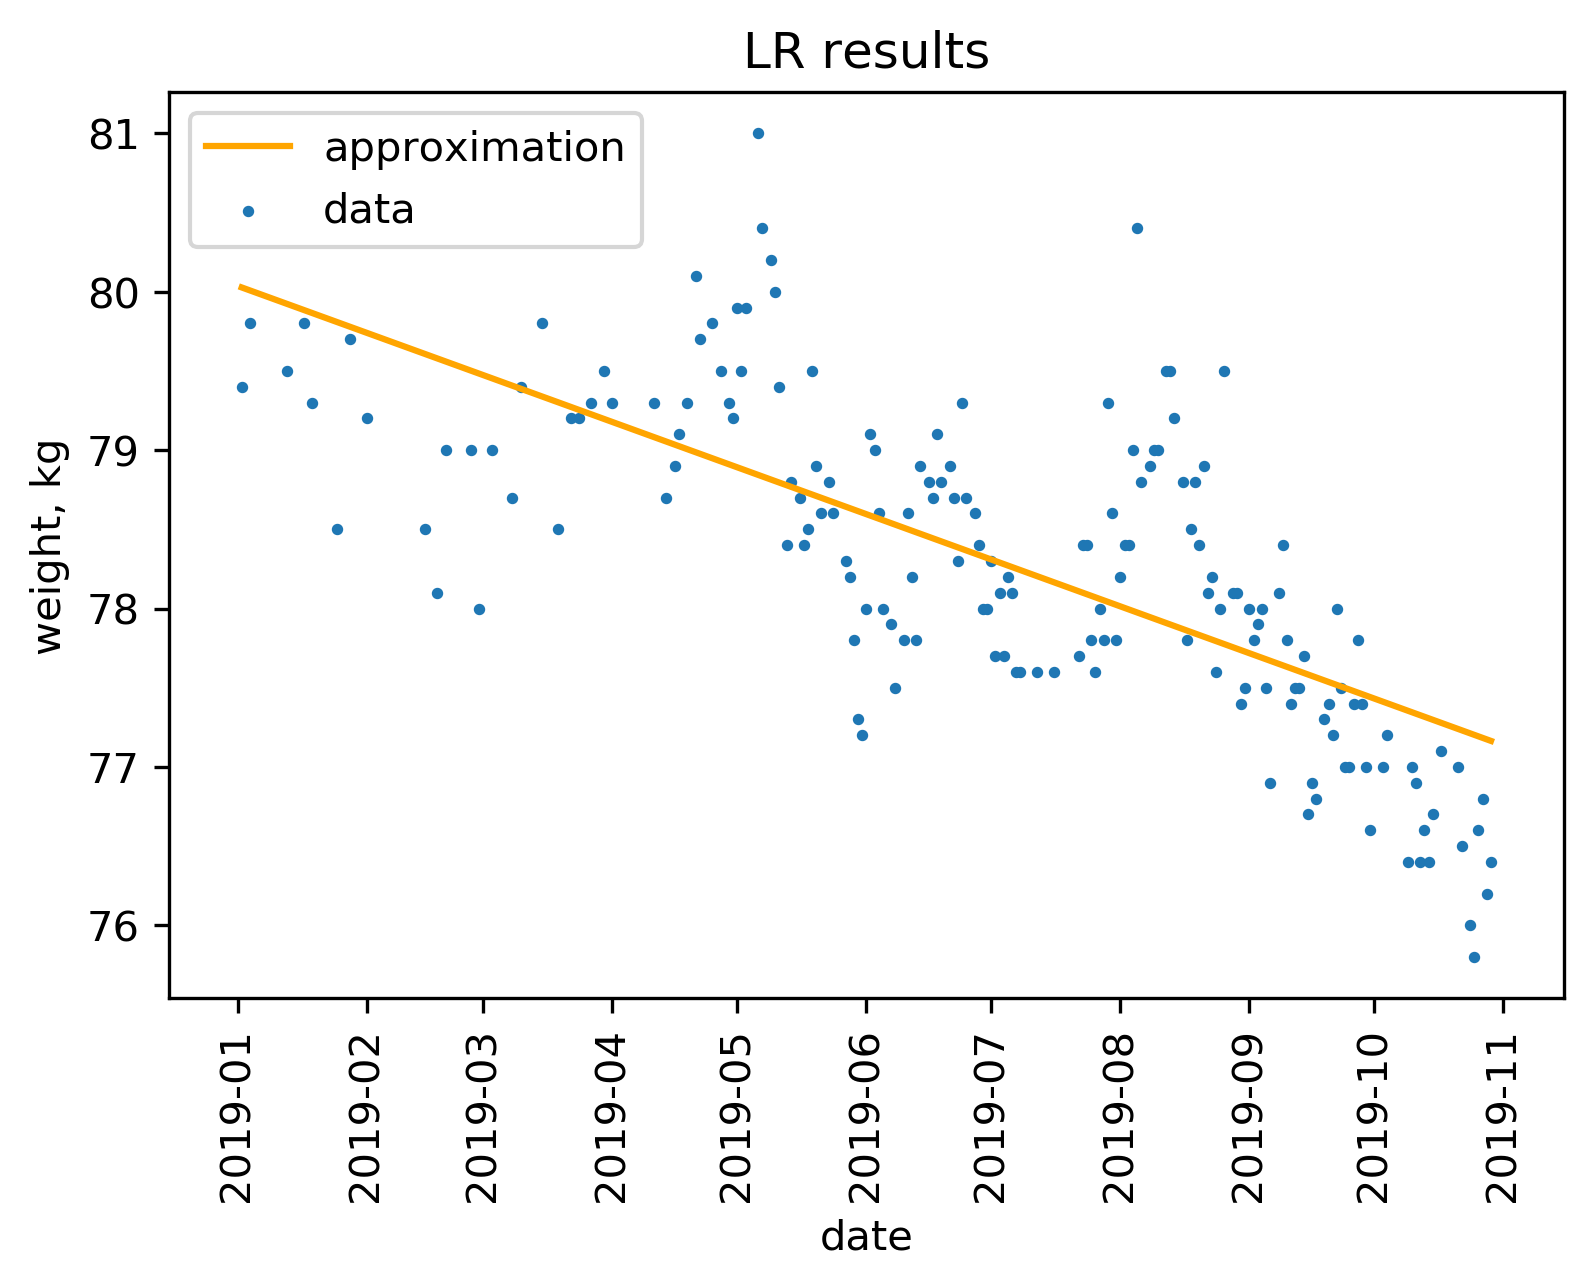

In [17]:
_ = plt.scatter(df.date, df.weight, s = 3, label='data')
_ = plt.plot(x_lin_datetimes, y_approx, color='orange', label='approximation')
_ = plt.xticks(rotation=90)
_ = plt.legend()
_ = plt.title('LR results')
_ = plt.xlabel('date')
_ = plt.ylabel('weight, kg')

### Прогноз на 31.12.2019:

In [24]:
x_test = datetime.datetime(2019,12,31,12,0,0).timestamp() - min_date

In [25]:
y_predicted = m.predict(np.array([[x_test]]))

In [26]:
print(y_predicted)

[76.55745888]


##  Решение линейной регрессии в матричном виде

Ранее было продемонстрировано, что решение задачи линейной регрессии методом максимального правдоподобия эквивалентно решению оптимизационной задачи для функции среднеквадратического отклонения (записано для $n$-мерного случая, $N$ - число экземпляров в обучающей выборке):

$$
x_i = (x_{i}^{(0)}, x_{i}^{(1)}, \dots, x_{i}^{(n)})
$$

$$
\theta = (\theta^{(0)}, \theta^{(1)}, \dots, \theta^{(n)})
$$

$$
\theta^* = \underset{\Theta}{\mathrm{argmin}} \sum_{i=1}^{N}{\left( y_i-\theta\cdot x_i \right)^2}
$$

Для записи в матричном виде введем т.н. матрицу объекты-признаки:

$$
X = \begin{bmatrix}
x_{0}^{(0)} & x_{0}^{(1)} & \dots & x_{0}^{(n)} \\
x_{1}^{(0)} & x_{1}^{(1)} & \dots & x_{1}^{(n)} \\
\dots \\
x_{N}^{(0)} & x_{N}^{(1)} & \dots & x_{N}^{(n)}
\end{bmatrix}
$$

При этом не забываем, что нулевая компонента векторов описания всех объектов - единица.

Кроме этого введем вектор-столбец целевой переменной:
$$
Y = \begin{bmatrix}
y_{0}\\
y_{1}\\
\dots \\
y_{N}
\end{bmatrix}
$$


При этом важно, что $\theta$ - также вектор-столбец

Тогда функция ошибки может быть записана следующим образом:

$$
\mathscr{L}(\theta, X, Y) = \left(Y-X\cdot\theta\right)^T\cdot(Y-X\cdot\theta) = \\
{Y^T}{Y}-2\theta^T{X^T}{Y}+\theta^T{X^T}{X}{\theta}
$$

$$
\frac{\partial{\mathscr{L}(\theta, X, Y)}}{\partial{\theta}} = -2{X^T}{Y} + 2{X^T}X\theta
$$

Поскольку функция ошибка квадратична по $\theta$, можно утверждать, что у нее есть экстремум и он глобальный. Положение этого экстремума можно найти обычным образом:

$$
\frac{\partial{\mathscr{L}(\theta, X, Y)}}{\partial{\theta}} = 0
$$

Отсюда (можно воспользоваться [Matrix cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)):

$$
2{X^T}X\theta^* = 2{X^T}{Y}
$$

$$
\theta^* = (X^T X)^{-1} X^T Y \tag{1} \label{eq:special}
$$

Осталось проверить, не максимум ли это. Для этого проверяем, что матрица вторых производных (по $\theta$) положительно определена:

$$
\frac{\partial^2 {\mathscr{L}(\theta, X, Y)}}{\partial\theta^2} = 2 X^T X
$$

### создаем матрицу объекты-признаки

In [18]:
X = np.asarray(df.datePOSIX).reshape((-1, 1))
X.shape

(166, 1)

In [19]:
X_0 = np.ones_like(X)

In [20]:
X = np.concatenate([X_0, X], axis=1)
X.shape

(166, 2)

### записываем матрицу (вектор-столбец) целевой переменной

In [21]:
Y = np.asarray(df.weight)[:,np.newaxis]
Y.shape

(166, 1)

### вычисляем $\theta^*$ по формуле (1)

In [22]:
m1 = np.dot(X.T, X)

In [23]:
m2 = np.linalg.inv(m1)

In [24]:
m3 = np.dot(m2, X.T)

In [25]:
theta_star = np.dot(m3, Y)

In [26]:
theta_star

array([[ 7.99052937e+01],
       [-9.98982953e-08]])

In [27]:
print(m.intercept_)
print(m.coef_)

79.90529368732287
[-9.98982953e-08]


## Что не так в этой задаче и ее решении?

## <font color="red">Скоро в программе:</font>

### - Оценка качества моделей регрессии

### - Оценка неопределенностей с применением <a href="https://en.wikipedia.org/wiki/Bootstrapping_(statistics)">bootstraping</a>

1. Оценить <a href="https://stattrek.com/estimation/confidence-interval.aspx">доверительные интервалы</a> с уровнем доверия 95% для параметров регрессии
2. Оценить <a href="https://en.wikipedia.org/wiki/Prediction_interval">предиктивный интервал</a> уровня 95% для значений y на области X исходных данных

Здесь же: ответ на вопрос о достоверности тренда

### Когда аналитические решение сложное (или очень лень): методы градиентной оптимизации

##  Решение линейной регрессии численной оптимизацией

До определенного момента построение решения аналогично решению в матричном виде.
Решение задачи линейной регрессии методом максимального правдоподобия эквивалентно решению оптимизационной задачи для функции среднеквадратического отклонения (записано для $n$-мерного случая, $N$ - число экземпляров в обучающей выборке):

$$
x_i = (x_{i}^{(0)}, x_{i}^{(1)}, \dots, x_{i}^{(n)})
$$

$$
\theta = (\theta^{(0)}, \theta^{(1)}, \dots, \theta^{(n)})
$$

$$
\theta^* = \underset{\Theta}{\mathrm{argmin}} \sum_{i=1}^{N}{\left( y_i-\theta\cdot x_i \right)^2}
$$

Матрица объекты-признаки:

$$
X = \begin{bmatrix}
x_{0}^{(0)} & x_{0}^{(1)} & \dots & x_{0}^{(n)} \\
x_{1}^{(0)} & x_{1}^{(1)} & \dots & x_{1}^{(n)} \\
\dots \\
x_{N}^{(0)} & x_{N}^{(1)} & \dots & x_{N}^{(n)}
\end{bmatrix}
$$

Вектор-столбец целевой переменной:
$$
Y = \begin{bmatrix}
y_{0}\\
y_{1}\\
\dots \\
y_{N}
\end{bmatrix}
$$


Функция ошибки:

$$
\mathscr{L}(\theta, X, Y) = \left(Y-X\cdot\theta\right)^T\cdot(Y-X\cdot\theta) = \\
{Y^T}{Y}-2\theta^T{X^T}{Y}+\theta^T{X^T}{X}{\theta}
$$

Для решения численной оптимизацией снова потребуется градиент функции ошибки в отношении $\theta$:

$$
\frac{\partial{\mathscr{L}(\theta, X, Y)}}{\partial{\theta}} = -2{X^T}{Y} + 2{X^T}X\theta
$$

Для некоторых методов численной оптимизации может потребоваться матрица вторых производных - гессиан

$$
\frac{\partial^2 {\mathscr{L}(\theta, X, Y)}}{\partial\theta^2} = 2 X^T X
$$